<a href="https://colab.research.google.com/github/adammoss/bnn_hmc/blob/main/results/CMD_MCD_lenet_64_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import shutil
import subprocess
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!nvidia-smi

Tue Aug 23 16:53:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    42W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install astro-datasets --upgrade
!pip install tensorflow_datasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
shutil.rmtree('bnn_hmc', ignore_errors=True)

In [5]:
!git clone https://github.com/adammoss/bnn_hmc

Cloning into 'bnn_hmc'...
remote: Enumerating objects: 475, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 475 (delta 133), reused 93 (delta 58), pack-reused 288
Receiving objects: 100% (475/475), 894.05 KiB | 11.76 MiB/s, done.
Resolving deltas: 100% (327/327), done.


In [6]:
!cd bnn_hmc && git checkout dropout_wip

Branch 'dropout_wip' set up to track remote branch 'dropout_wip' from 'origin'.
Switched to a new branch 'dropout_wip'


In [7]:
# https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install --upgrade https://storage.googleapis.com/jax-releases/cuda111/jaxlib-0.1.65+cuda111-cp37-none-manylinux2010_x86_64.whl
!pip install jax==0.2.12
!pip install dm-haiku==0.0.5.dev0 optax==0.0.6 chex==0.0.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://storage.googleapis.com/jax-releases/cuda111/jaxlib-0.1.65+cuda111-cp37-none-manylinux2010_x86_64.whl (189.4 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
for i, root in enumerate(glob.glob('/content/runs/*/')):
  shutil.rmtree(root, ignore_errors=True)

In [96]:
!python3 bnn_hmc/scripts/run_sgd.py --seed=0 --weight_decay=10 --dir=runs/sgd/cmd/ \
--dataset_name=cmd --scaling=asinh --builder_kwargs='{"simulation": "IllustrisTNG", "field": "Mtot", "parameters": ["omegam"]}' \
--model_name=lenet_dropout --init_step_size=1e-7 --num_epochs=100 --eval_freq=5 \
--batch_size=100 --image_size 64 --save_freq=5 --optimizer=SGD --train_split=train[:90%] --test_split=train[90%:95%] \
--patience 50 --dropout_rate 0.1

JAX sees the following devices: [GpuDevice(id=0, process_index=0)]
TF sees the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
tcmalloc: large alloc 1183137792 bytes == 0xe8e1a000 @  0x7efed5b30887 0x7efec3c357ce 0x7efec3c3a2c2 0x7efec3c408a2 0x7efec3c40e7d 0x7efec3c411e9 0x7efec3232f11 0x7efec322e19f 0x7efec3749d01 0x7efec324d594 0x7efec324e126 0x7efec2963a69 0x7efec295d4e0 0x7efec2967a3c 0x7efec2957ba6 0x7efec2724fa5 0x7efec271a961 0x593784 0x594731 0x548cc1 0x51566f 0x593dd7 0x5118f8 0x549576 0x593fce 0x548ae9 0x51566f 0x598ef4 0x500d94 0x5a7284 0x5a9cf4
Starting from random initialization with provided seed
/content/bnn_hmc/bnn_hmc/utils/script_utils.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predict_fn(net_apply, p

In [97]:
!python3 bnn_hmc/scripts/run_sgd.py --seed=0 --weight_decay=10 --dir=runs/sgd/cmd/ \
--dataset_name=cmd --scaling=asinh --builder_kwargs='{"simulation": "IllustrisTNG", "field": "Mtot", "parameters": ["omegam"]}' \
--model_name=lenet_dropout --init_step_size=1e-7 --num_epochs=100 --eval_freq=5 \
--batch_size=100 --image_size 64 --save_freq=5 --optimizer=SGD --eval_split=train[95%:] \
--patience 10 --dropout_rate 0.1 --repeats 10

JAX sees the following devices: [GpuDevice(id=0, process_index=0)]
TF sees the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
tcmalloc: large alloc 1183137792 bytes == 0x106520000 @  0x7f819bb0c887 0x7f8189c117ce 0x7f8189c162c2 0x7f8189c1c8a2 0x7f8189c1ce7d 0x7f8189c1d1e9 0x7f818920ef11 0x7f818920a19f 0x7f8189725d01 0x7f8189229594 0x7f818922a126 0x7f818893fa69 0x7f81889394e0 0x7f8188943a3c 0x7f8188933ba6 0x7f8188700fa5 0x7f81886f6961 0x593784 0x594731 0x548cc1 0x51566f 0x593dd7 0x5118f8 0x549576 0x593fce 0x548ae9 0x51566f 0x598ef4 0x500d94 0x5a7284 0x5a9cf4
Continuing the run from the last saved checkpoint
bnn_hmc/scripts/run_sgd.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predict_fn(net_apply, params, net_state, test_s

In [98]:
predictions = []
errors = []
for i, root in enumerate(glob.glob('/content/runs/sgd/cmd/*/predictions*npy')):
  data = np.load(root.replace('predictions', 'test_set')) 
  prediction = np.load(root)
  metrics = np.load(root.replace('predictions', 'metrics'), allow_pickle=True)
  print(metrics)
  predictions.append(prediction[0,:,0])
  errors.append(prediction[0,:,1])
predictions = np.array(predictions)
errors = np.array(errors)

{'scaled_nll': array(-1.4930145, dtype=float32), 'scaled_mse': array(0.00341881, dtype=float32), 'scaled_rmse': 0.05847055, 'nll': array(-1.4930145, dtype=float32), 'mse': array(0.00341881, dtype=float32), 'rmse': 0.05847055}
{'scaled_nll': array(-1.4995964, dtype=float32), 'scaled_mse': array(0.00336141, dtype=float32), 'scaled_rmse': 0.057977643, 'nll': array(-1.4995964, dtype=float32), 'mse': array(0.00336141, dtype=float32), 'rmse': 0.057977643}
{'scaled_nll': array(-1.5112662, dtype=float32), 'scaled_mse': array(0.00333989, dtype=float32), 'scaled_rmse': 0.057791762, 'nll': array(-1.5112662, dtype=float32), 'mse': array(0.00333989, dtype=float32), 'rmse': 0.057791762}
{'scaled_nll': array(-1.4975413, dtype=float32), 'scaled_mse': array(0.00342172, dtype=float32), 'scaled_rmse': 0.05849548, 'nll': array(-1.4975413, dtype=float32), 'mse': array(0.00342172, dtype=float32), 'rmse': 0.05849548}
{'scaled_nll': array(-1.5111887, dtype=float32), 'scaled_mse': array(0.00325706, dtype=float

In [99]:
mean_predictions = np.mean(predictions, axis=0)
mean_errors = np.mean(errors, axis=0)
total_errors = (mean_errors**2 + np.std(predictions, axis=0)**2)**0.5
diffs = mean_predictions - data[0,:,0]

In [100]:
print('Ensemble MSE', np.mean(diffs**2))
print('Ensemble MAE', np.mean(np.abs(diffs)))

Ensemble MSE 0.0030813662
Ensemble MAE 0.044649404


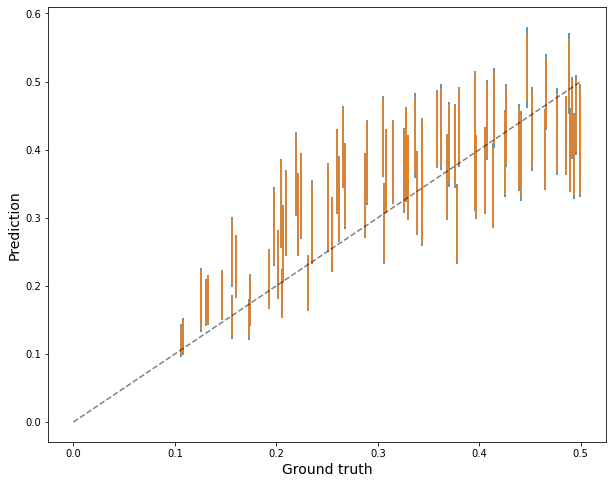

In [101]:
plt.figure(figsize=(10,8))
plt.errorbar(data[0,::10,0], mean_predictions[::10], total_errors[::10],  ls='none')
plt.errorbar(data[0,::10,0], mean_predictions[::10], mean_errors[::10],  ls='none')
plt.plot(np.linspace(0,0.5,10), np.linspace(0,0.5,10), linestyle='--', color='black', alpha=0.5)
plt.xlabel('Ground truth', fontsize=14)
plt.ylabel('Prediction', fontsize=14)
plt.show()